In [1]:
import os
import ast
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import constants

In [2]:
def summarize(path, fname, name):
    model_meta = pd.read_csv(os.path.join(path, fname))
    def replace(x):
        try:
            return ast.literal_eval(x)
        except:
            return x
    for col in ['train_losses', 'valid_losses']:
        try:
            model_meta[col] = model_meta[col].apply(replace)
        except:
            pass

    model_meta['epochs'] = model_meta['train_losses'].apply(len)
    model_meta['final_train_loss'] = model_meta['train_losses'].apply(lambda x: x[-1])
    model_meta = model_meta.assign(approach=name)

    return model_meta

In [28]:
all_model_df = pd.DataFrame()

root_dir = os.path.join(constants.RESULTS_DIR, 'motor_LR', 'chan_avg_rnn', 'rs', 'accuracy')
exp_dir = 'avg_chan_rnn_16-hidden_1-rnn_1-fc_bidirectional'

df = summarize(os.path.join(root_dir, exp_dir), 'trial_results.csv', 'Temp')

In [29]:
df.columns

Index(['final_test_loss', 'montage', 'subject', 'test_accuracy', 'test_auc',
       'test_f1', 'test_sensitivity', 'test_specificity', 'train_accuracy',
       'train_auc', 'train_f1', 'train_losses', 'train_sensitivity',
       'train_specificity', 'valid_accuracy', 'valid_auc', 'valid_f1',
       'valid_loss', 'valid_losses', 'valid_sensitivity', 'valid_specificity',
       'epochs', 'final_train_loss', 'approach'],
      dtype='object')

In [30]:
df.groupby(['montage']).mean()[['test_accuracy', 'test_specificity', 'test_sensitivity']]

,test_accuracy,test_specificity,test_sensitivity
montage,,,
a,0.494569,0.565556,0.418687
b,0.499289,0.705758,0.295152
c,0.496901,0.563636,0.429293
d,0.507937,0.448182,0.561111
e,0.496512,0.514242,0.482727
f,0.514204,0.573535,0.471515
g,0.503354,0.246061,0.744949
h,0.508278,0.442424,0.578889


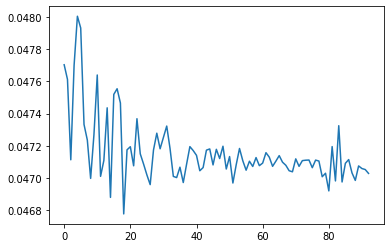

In [31]:
plt.plot(df.loc[0, 'train_losses'])